## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Initialize import *  ## this can be used to import all functions stored in a .py file
## ToDo: figure out how to use yaml files to 

Define some constants (global perhaps?). Inital values to be stored in a yaml file//outside the notebook

In [137]:
F12 = 90
F21 = 90
F15 = 110
F51 = 55
F57 = 55
F71 = 55 #detritus decomposition
F72 = 0
F17 = F25 = F27 = F52 = F75 = 0

M0 = [725, 725, 110, 60] # 4 box model M0 values 
Flux_in = np.array([[0, F21, F51, F71], \
                    [F12, 0, F52, F72], \
                    [F15, F25, 0, F75],\
                    [F17, F27, F57, 0]])
Flux_out = np.array([[0, F12, F15, F17], \
                    [F21, 0, F25, F27], \
                    [F51, F52, 0, F57],\
                    [F71, F72, F75, 0]])
Mass_Flux_total = sum(Flux_in - Flux_out)
if sum(Mass_Flux_total) == 0:
    print('Net flux is 0')

## find K values for intial Steady State fluxes given
k_in = Flux_in.T/M0
k_out = sum(Flux_out/M0)
k = k_in.T - k_out*np.diag(np.ones(4))

# The timespan to integrate over
t = np.linspace(0, 100, 100) # some time span


Net flux is 0


In [129]:
## Defining functions, 
def Massflux(M, t):
    M1, M2, M5, M7 = M
    Flux_in = np.array([[0, F21, F51, F71], \
                    [F12, 0, F52, F72], \
                    [F15, F25, 0, F75],\
                    [F17, F27, F57, 0]])
    Flux_out = np.array([[0, F12, F15, F17], \
                    [F21, 0, F25, F27], \
                    [F51, F52, 0, F57],\
                    [F71, F72, F75, 0]])
    Mass_Flux_total = sum(Flux_in - Flux_out)

    ## find K values for intial Steady State fluxes given
    k_in = Flux_in.T/M0
    k_out = sum(Flux_out/M0)
    k = k_in.T - k_out*np.diag(np.ones(4))
    dMdt = np.matmul(k, M)
    return dMdt

def FindK(F ,t):
    dMdt = F 
    return dMdt 



Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

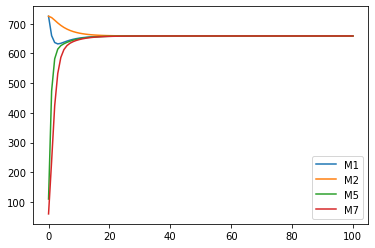

In [138]:
Ms = sci.odeint(Massflux, M0, t)

plt.title()
plt.plot(t, Ms[:, 0], label = 'M1')
plt.plot(t, Ms[:, 1], label = 'M2')
plt.plot(t, Ms[:, 2], label = 'M5')
plt.plot(t, Ms[:, 3], label = 'M7')
plt.legend()

Check if the given flux values give a steady state (they do)

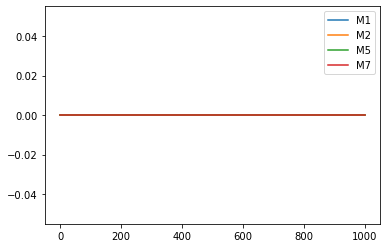

In [134]:
MF = sci.odeint(FindK, F, t) ## flux vals already at steady state? use these to find k values.

plt.plot(t, MF[:, 0], label = 'M1')
plt.plot(t, MF[:, 1], label = 'M2')
plt.plot(t, MF[:, 2], label = 'M5')
plt.plot(t, MF[:, 3], label = 'M7')
plt.legend()